In [1]:
from google.colab import drive
drive.mount("/content/drive") # , force_remount=True)

Mounted at /content/drive


In [1]:
import keras
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import sys
import cv2
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

# Insert the directory
sys.path.insert(0, '..')

from train.inception import load_data

Using TensorFlow backend.


In [2]:
X_train, Y_train, X_test, Y_test = load_data(classesFromFile=True, imageFolder='../../_datasets/deepcardio/170215_RyR-GFP30_RO_01_Serie2_SPARKS-calcium')
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.2, random_state=1)

Prop of sparks in train dataset: 14.92, and in validation dataset: 14.6


## inceptionv3_200epochs.h5

In [3]:
inceptionv3 = keras.applications.InceptionV3(include_top=True, weights=None, classes=2, input_shape=X_train[0].shape)
inceptionv3.load_weights("inceptionv3_200epochs.h5")

class_labels = ['no-spark', 'spark']

In [4]:
Y_test_pred = inceptionv3.predict(X_test)
Y_valid_pred = inceptionv3.predict(X_valid)

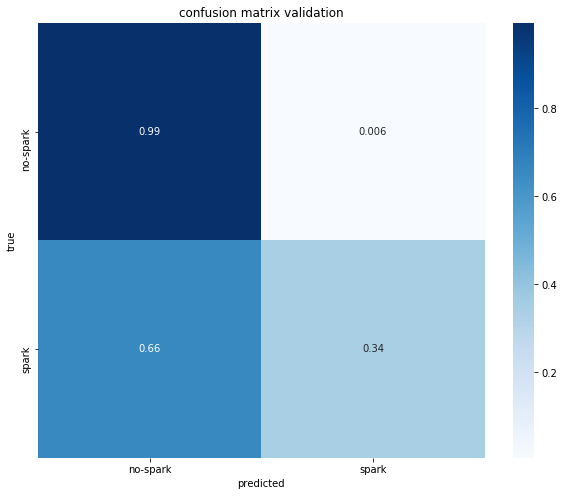

Classification report validation:
               precision    recall  f1-score   support

    no-spark       0.89      0.99      0.94       334
       spark       0.91      0.34      0.50        61

    accuracy                           0.89       395
   macro avg       0.90      0.67      0.72       395
weighted avg       0.90      0.89      0.87       395



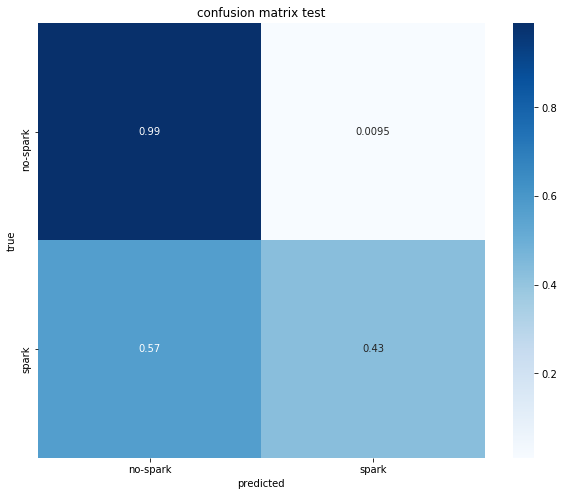

Classification report test:
               precision    recall  f1-score   support

    no-spark       0.91      0.99      0.95       421
       spark       0.89      0.43      0.58        72

    accuracy                           0.91       493
   macro avg       0.90      0.71      0.76       493
weighted avg       0.91      0.91      0.89       493



In [11]:
confMatrix = confusion_matrix(Y_valid.argmax(axis=1), Y_valid_pred.argmax(axis=1), normalize='true')
plt.figure(figsize=(10,8))
sns.heatmap(confMatrix, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, annot=True)
plt.title('confusion matrix validation')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()
print("Classification report validation:\n",  classification_report(Y_valid.argmax(axis=1), Y_valid_pred.argmax(axis=1), target_names=class_labels))

confMatrix = confusion_matrix(Y_test.argmax(axis=1), Y_test_pred.argmax(axis=1), normalize='true')
plt.figure(figsize=(10,8))
sns.heatmap(confMatrix, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, annot=True)
plt.title('confusion matrix test')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()
print("Classification report test:\n",  classification_report(Y_test.argmax(axis=1), Y_test_pred.argmax(axis=1), target_names=class_labels))

## inceptionv3_ep200_batch32_metricSparkRecall.h5

In [12]:
inceptionv3 = keras.applications.InceptionV3(include_top=True, weights=None, classes=2, input_shape=X_train[0].shape)
inceptionv3.load_weights("inceptionv3_ep200_batch32_metricSparkRecall.h5")

class_labels = ['no-spark', 'spark']

In [13]:
Y_test_pred = inceptionv3.predict(X_test)
Y_valid_pred = inceptionv3.predict(X_valid)

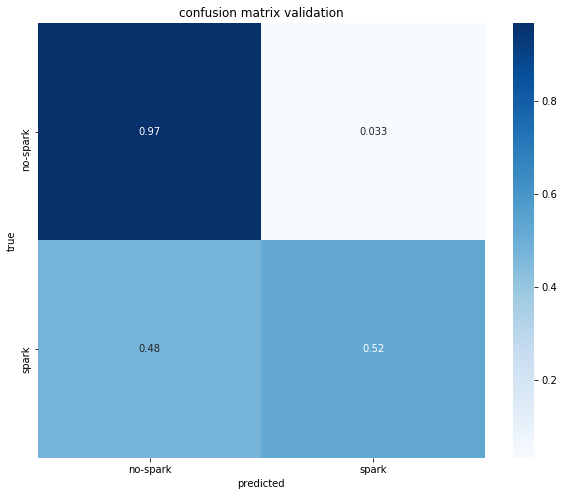

Classification report validation:
               precision    recall  f1-score   support

    no-spark       0.92      0.97      0.94       334
       spark       0.74      0.52      0.62        61

    accuracy                           0.90       395
   macro avg       0.83      0.75      0.78       395
weighted avg       0.89      0.90      0.89       395



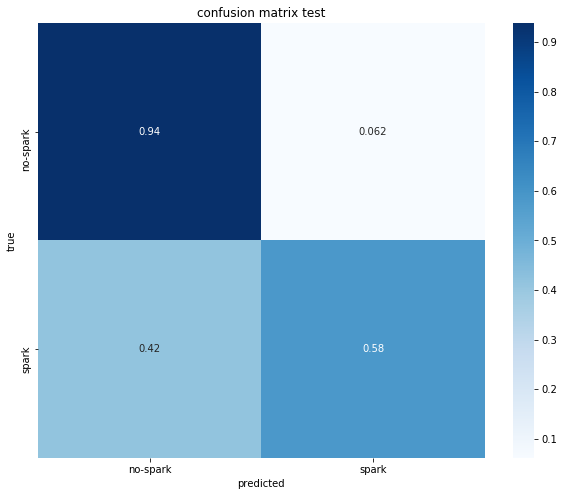

Classification report test:
               precision    recall  f1-score   support

    no-spark       0.93      0.94      0.93       421
       spark       0.62      0.58      0.60        72

    accuracy                           0.89       493
   macro avg       0.77      0.76      0.77       493
weighted avg       0.88      0.89      0.89       493



In [14]:
confMatrix = confusion_matrix(Y_valid.argmax(axis=1), Y_valid_pred.argmax(axis=1), normalize='true')
plt.figure(figsize=(10,8))
sns.heatmap(confMatrix, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, annot=True)
plt.title('confusion matrix validation')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()
print("Classification report validation:\n",  classification_report(Y_valid.argmax(axis=1), Y_valid_pred.argmax(axis=1), target_names=class_labels))

confMatrix = confusion_matrix(Y_test.argmax(axis=1), Y_test_pred.argmax(axis=1), normalize='true')
plt.figure(figsize=(10,8))
sns.heatmap(confMatrix, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, annot=True)
plt.title('confusion matrix test')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()
print("Classification report test:\n",  classification_report(Y_test.argmax(axis=1), Y_test_pred.argmax(axis=1), target_names=class_labels))

## inceptionv3_ep200_batch32_justMetricSparkRecall.h5

In [7]:
inceptionv3 = keras.applications.InceptionV3(include_top=True, weights=None, classes=2, input_shape=X_train[0].shape)
inceptionv3.load_weights("inceptionv3_ep200_batch32_justMetricSparkRecall.h5")

class_labels = ['no-spark', 'spark']

In [8]:
Y_test_pred = inceptionv3.predict(X_test)
Y_valid_pred = inceptionv3.predict(X_valid)

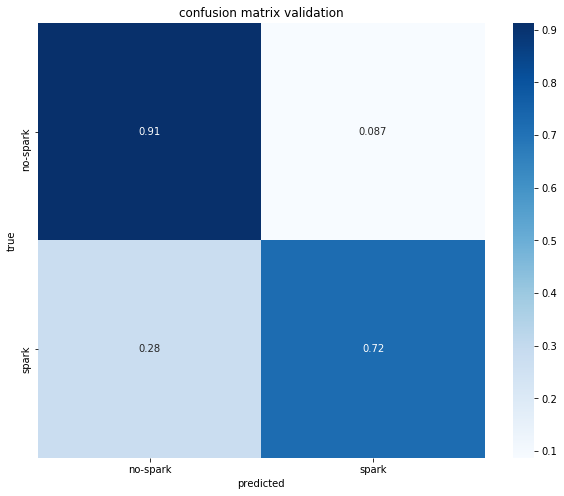

Classification report validation:
               precision    recall  f1-score   support

    no-spark       0.95      0.91      0.93       334
       spark       0.60      0.72      0.66        61

    accuracy                           0.88       395
   macro avg       0.77      0.82      0.79       395
weighted avg       0.89      0.88      0.89       395



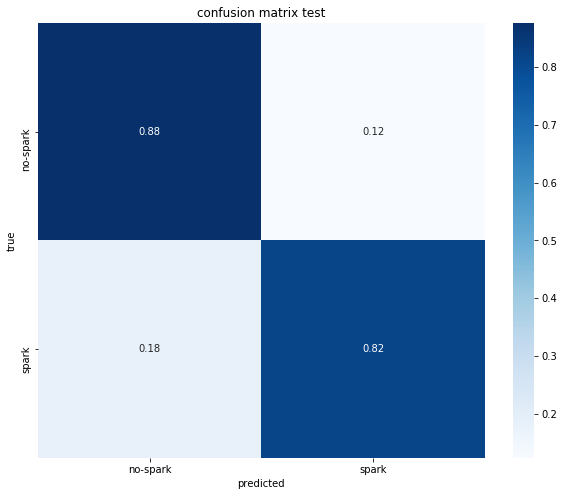

Classification report test:
               precision    recall  f1-score   support

    no-spark       0.97      0.88      0.92       421
       spark       0.53      0.82      0.64        72

    accuracy                           0.87       493
   macro avg       0.75      0.85      0.78       493
weighted avg       0.90      0.87      0.88       493



In [9]:
confMatrix = confusion_matrix(Y_valid.argmax(axis=1), Y_valid_pred.argmax(axis=1), normalize='true')
plt.figure(figsize=(10,8))
sns.heatmap(confMatrix, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, annot=True)
plt.title('confusion matrix validation')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()
print("Classification report validation:\n",  classification_report(Y_valid.argmax(axis=1), Y_valid_pred.argmax(axis=1), target_names=class_labels))

confMatrix = confusion_matrix(Y_test.argmax(axis=1), Y_test_pred.argmax(axis=1), normalize='true')
plt.figure(figsize=(10,8))
sns.heatmap(confMatrix, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, annot=True)
plt.title('confusion matrix test')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()
print("Classification report test:\n",  classification_report(Y_test.argmax(axis=1), Y_test_pred.argmax(axis=1), target_names=class_labels))

## Mal classificats

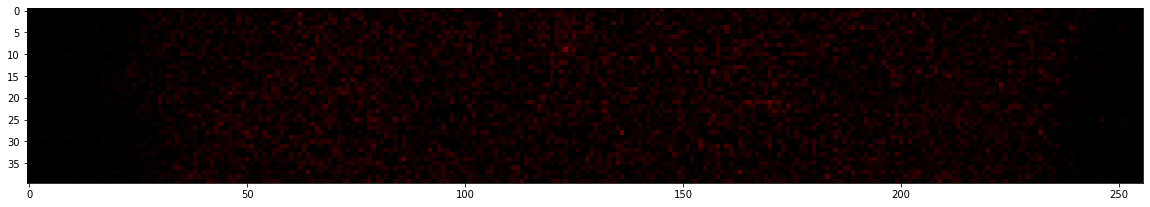

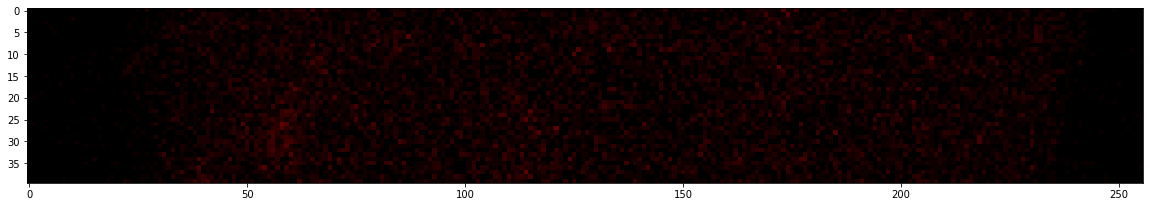

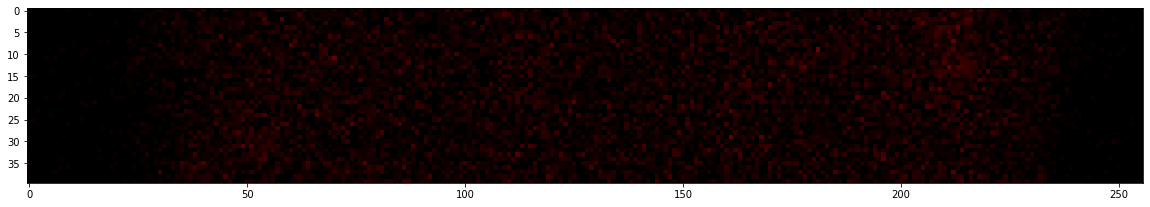

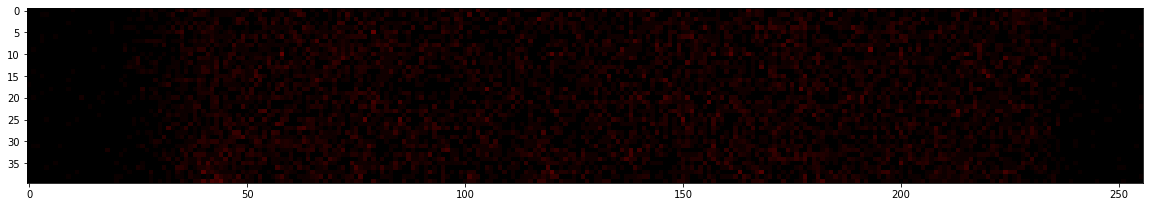

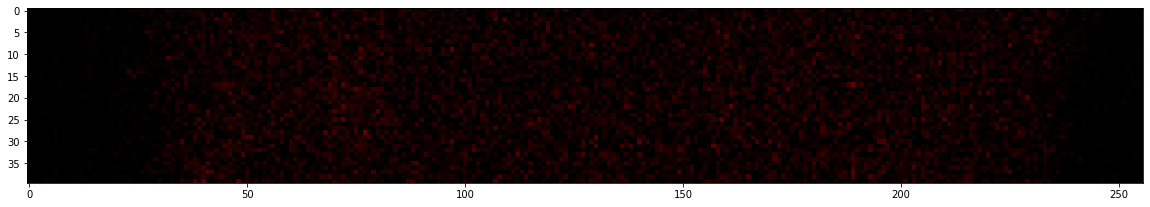

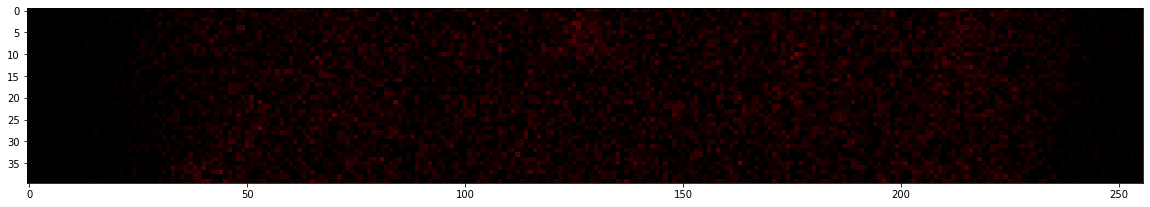

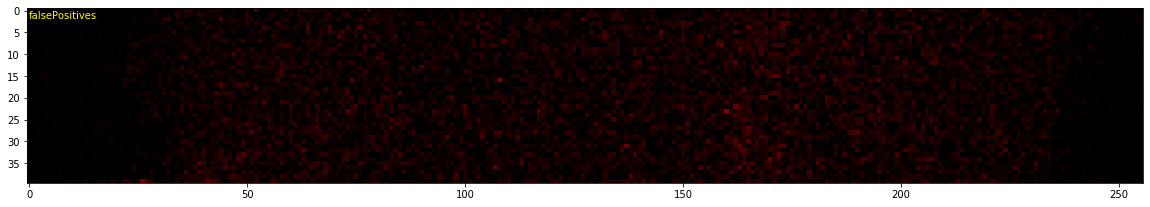

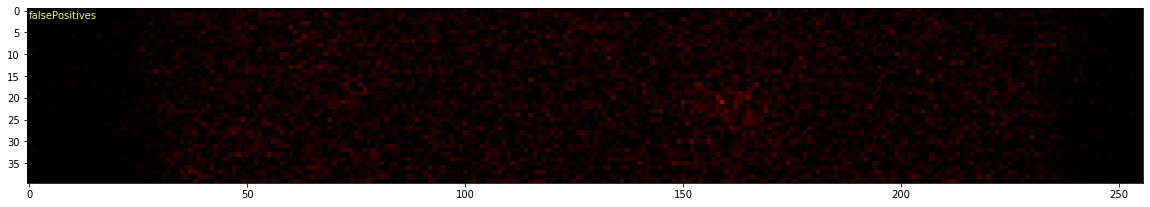

In [66]:
falseNegatives = (Y_valid.argmax(axis=1)==1) & (Y_valid_pred.argmax(axis=1)!=1)
falsePositives = (Y_valid.argmax(axis=1)==0) & (Y_valid_pred.argmax(axis=1)==1)

plottedCount = 0
for i, isFN in enumerate(falseNegatives):
    if not isFN:
        continue
    plt.figure(figsize=(20,10))
    plt.imshow(cv2.cvtColor(X_valid[i][:40], cv2.COLOR_BGR2RGB))
    plt.show()
    plottedCount += 1
    if plottedCount > 5:
        break
plottedCount = 0
for i, isFN in enumerate(falsePositives):
    if not isFN:
        continue
    plt.figure(figsize=(20,10))
    plt.imshow(cv2.cvtColor(X_valid[i][:40], cv2.COLOR_BGR2RGB))
    plt.text(0, 0, 'falsePositives', c='yellow', verticalalignment='top')
    plt.show()
    plottedCount += 1
    if plottedCount > 5:
        break